# <font color = #73ae14> General Shapes of LC_fits + added noise 
Function depending on 
- Height / Amplitude 
- Time / Width 
- Type of transient 

In [1]:
from Lightcurve import rescale_x, rescale_y,fit_LC_simple_Gaussian,fit_LC_small_Gaussian, save_LAT_txt,Gauss, exp, reset_txt
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
% matplotlib inline 

import os
import scipy
from scipy.optimize import curve_fit
from scipy import signal 
from scipy import stats

from collections import OrderedDict

tugreen = '#73ae14'

In [2]:
reset_txt() 

### Some examples of Lightcurve.py functions 

Results of the Gaussian fit:  [  2.10454980e+02   1.50153084e+04   6.33711074e+02   4.85366745e+00]


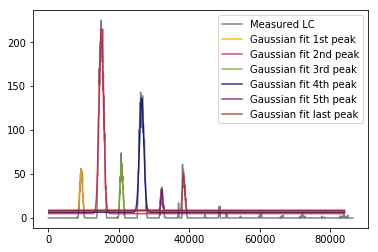

In [4]:
x,y = np.genfromtxt('DATA/LC_SOLAR/Flare20120307.txt', unpack=True)
plt.plot(x,y,color='grey', label='Measured LC')

params, cov = curve_fit(Gauss, x,y, p0=(50,15000,100,0))
params1, cov = curve_fit(Gauss, x,y, p0=(200,10000,100,0))
params2, cov = curve_fit(Gauss, x,y, p0=(100,21000,100,0))
params3, cov = curve_fit(Gauss, x,y, p0=(150,27000,100,0))
params4, cov = curve_fit(Gauss, x,y, p0=(30,32000,100,0))
params5, cov = curve_fit(Gauss, x,y, p0=(50,38000,100,0))
print('Results of the Gaussian fit: ', params)
xlin = np.linspace(100,84000, 1000000)


plt.plot(xlin,Gauss(xlin,*params1),color='orange', alpha = 0.8, label='Gaussian fit 1st peak')
plt.plot(xlin,Gauss(xlin,*params),color='crimson', alpha = 0.8, label='Gaussian fit 2nd peak')
plt.plot(xlin,Gauss(xlin,*params2),color=tugreen, alpha = 0.8, label='Gaussian fit 3rd peak')
plt.plot(xlin,Gauss(xlin,*params3),color='navy', alpha = 0.8, label='Gaussian fit 4th peak')
plt.plot(xlin,Gauss(xlin,*params4),color='purple', alpha = 0.8, label='Gaussian fit 5th peak')
plt.plot(xlin,Gauss(xlin,*params5),color='brown', alpha = 0.8, label='Gaussian fit last peak')
#plt.xlim(0,10000)
plt.legend() ; plt.savefig('Plots/Lc_fits/SolarFlares.pdf')
plt.show()

## Power Law Decay from LAT paper

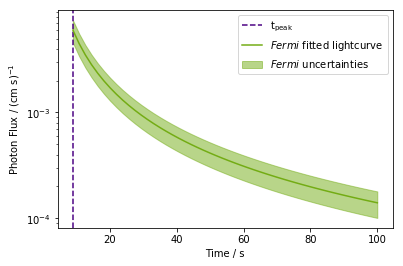

In [40]:
from uncertainties import ufloat
from uncertainties import unumpy as unp

# Example 090902
plt.ylabel('Photon Flux / (cm s)$^{-1}$')
plt.xlabel('Time / s')

def Simple(t,tp,alpha,F0):
    return F0*(t/tp)**(-alpha)

xlin = np.linspace(9,100)
tp = ufloat(9,1)
alpha = ufloat(1.56,0.06)
F0 = ufloat(600,100)*1e-5

Values = Simple(xlin,tp,alpha,F0)
Val = unp.nominal_values(Values)
Err = unp.std_devs(Values)
plt.axvline(9, label='t$_{\mathrm{peak}}$', ls='--', color='indigo')
plt.plot(xlin,Val, color='#73ac14', label='$Fermi$ fitted lightcurve')
plt.fill_between(xlin,Val-Err,Val+Err,color='#73ac14', lw=1, alpha=0.5, label='$Fermi$ uncertainties')
plt.yscale('log')
plt.legend()
plt.savefig('Plots/Simple_Powerlaw.pdf', bbox_inches= 'tight')

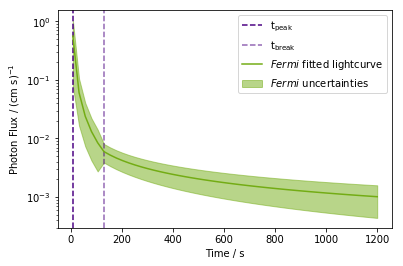

In [41]:
# Example 090902
plt.ylabel('Photon Flux / (cm s)$^{-1}$')
plt.xlabel('Time / s')
@np.vectorize
def Broken(t,tb,alpha1, alpha2,F0):
    if t< tb:
        return F0*(t/tb)**(-alpha1)
    else:
        return F0*(t/tb)**(-alpha2)

xlin = np.linspace(9,1200)
tb = ufloat(130,50,1)
alpha1 = ufloat(1.7,0.2)
alpha2 = ufloat(0.8,0.2)
F0 = ufloat(600,100)*1e-5

Values = Broken(xlin,tb,alpha1,alpha2,F0)
Val = unp.nominal_values(Values)
Err = unp.std_devs(Values)
plt.axvline(9, label='t$_{\mathrm{peak}}$', ls='--', color='indigo')
plt.axvline(130, label='t$_{\mathrm{break}}$', ls='--', color='indigo', alpha=0.6)
plt.plot(xlin,Val, color='#73ac14', label='$Fermi$ fitted lightcurve')
plt.fill_between(xlin,Val-Err,Val+Err,color='#73ac14', lw=1, alpha=0.5, label='$Fermi$ uncertainties')
plt.yscale('log')
plt.legend()
plt.savefig('Plots/Broken_Powerlaw.pdf', bbox_inches= 'tight')

In [ ]:
from Lightcurve import rescale_x, rescale_y
@np.vectorize
def Step_exp(t,tp,Fp,b ,alpha):
    if t < tp:
        return float(0)  # uniform data types 
    if t >= tp:
        return float(Fp*(t/tp-b)**(-alpha))

rescale_x('/home/jana/Schreibtisch/Projekt_Master/Project_Master/DATA/LC/LAT_090902.txt')
rescale_y('/home/jana/Schreibtisch/Projekt_Master/Project_Master/DATA/LC/LAT_090902.txt')
x,y = np.genfromtxt('/home/jana/Schreibtisch/Projekt_Master/Project_Master/DATA/LC/LAT_090902.txt', unpack=True, skip_header=1 ) ; y=y-y[0]


plt.plot(x,y,'-',color='grey', label='$Fermi$-measured LC')
x2 =np.linspace(-300,300,1000)
y2 = Step_exp(x2,0.71,0.27,-3,0.95)/ Step_exp(0.71,0.71,0.27,-3,0.95)
plt.plot(x2,y2, color=tugreen,lw=2, label='Fitted exponential decline')

plt.legend()
plt.ylabel(r' Normalized flux / a.u.')
plt.xlabel('Time / seconds after trigger')
plt.ylim(-0.02)
plt.title('GRB090926')
plt.savefig('Exponential.jpg')

In [ ]:
rescale_x('/home/jana/Schreibtisch/Projekt_Master/Project_Master/DATA/LC/LAT_090902.txt')
rescale_y('/home/jana/Schreibtisch/Projekt_Master/Project_Master/DATA/LC/LAT_090902.txt')
x,y = np.genfromtxt('/home/jana/Schreibtisch/Projekt_Master/Project_Master/DATA/LC/LAT_090902.txt', unpack=True, skip_header=1 )
A0 = y.max() ; index = np.argmax(y)
mu0 = x[index] ## Mitte / Peak, ab hier -1 für exp. Fit
y = y+abs(y.min())+1e-3

plt.plot(x,y,'-',color='grey', label='$Fermi$-measured LC')
params, cov = curve_fit(Gauss, x,y,p0=(2,mu0,5,0)) ;  errors = np.sqrt(np.diag(cov))
xlin = np.linspace(-300,300, 10000)
plt.plot(xlin,Gauss(xlin,*params),color=tugreen,lw=2, alpha = 0.8, label='Gaussian fit')

plt.ylabel(r' Normalized flux / a.u.')#
plt.xlabel('Time / seconds after trigger')
plt.legend() ;
plt.title('GRB090926')
plt.savefig('Plots/Simple_Gauss.jpeg')
plt.show()

##  <font color = #73ae14> 1. Gaussian Shape 
### a.) bride, 'normal' Gaussian 

Fitergebnisse Gauß:  [  8.20959239e-01   3.10231713e+02   3.89045126e+00   6.68271636e-02]


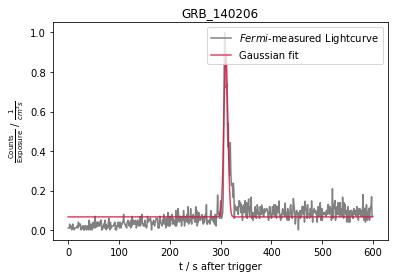

Fitergebnisse Gauß:  [  5.61254146e-01   3.11382627e+02   3.30866286e+00   1.17761579e-01]


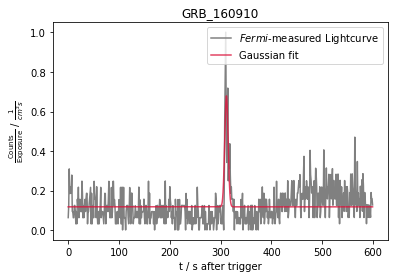

Fitergebnisse Gauß:  [  5.99048996e-01   3.07287880e+02   2.84097963e+00   1.68956574e-01]


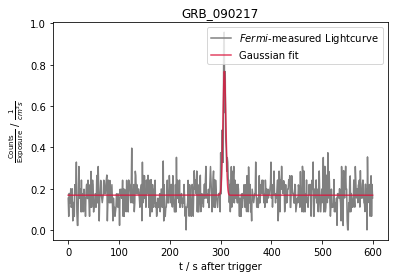

Fitergebnisse Gauß:  [  5.55693506e-01   3.07310796e+02   4.33629486e+00   2.02084120e-01]


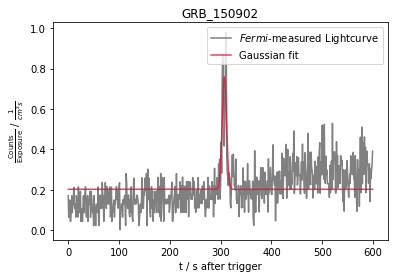

Fitergebnisse Gauß:  [  3.88578527e-01   3.16206959e+02   1.60366398e+01   3.07995583e-01]


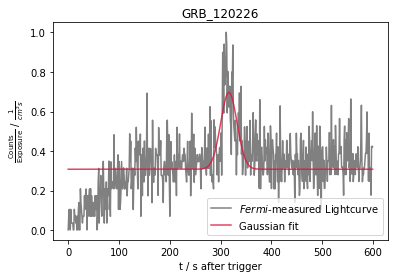

Fitergebnisse Gauß:  [  6.18427722e-01   3.15876387e+02   5.75022853e+00   5.77712722e-02]


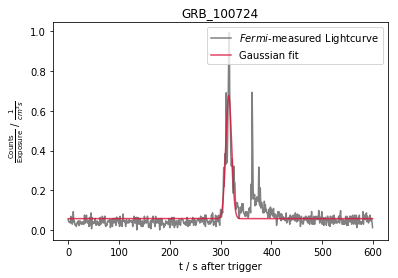

Fitergebnisse Gauß:  [  6.42750908e-01   3.13688977e+02   5.80533091e+00   1.19505952e-01]


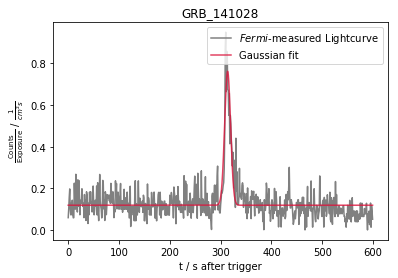

Fitergebnisse Gauß:  [  7.08088319e-01   3.09915917e+02   3.74298049e+00   7.22522412e-02]


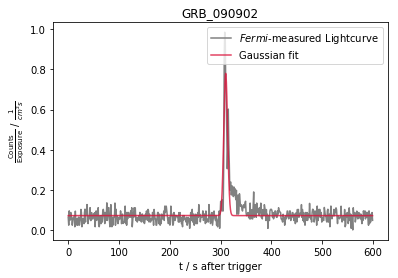

Fitergebnisse Gauß:  [  6.11933016e-01   3.01634830e+02   2.22553454e+00   1.15500748e-01]


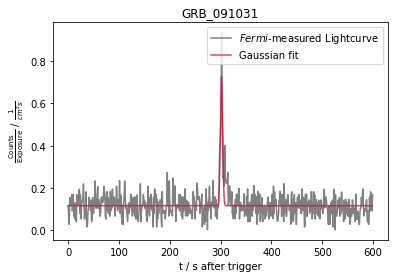

Fitergebnisse Gauß:  [  4.71099709e-01   3.11203880e+02   2.76520007e+00   8.26727618e-02]


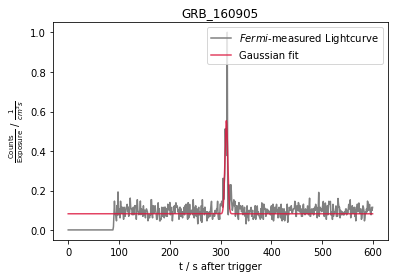

Fitergebnisse Gauß:  [  6.21578175e-01   3.25950219e+02   3.80902025e+00   2.34304432e-01]


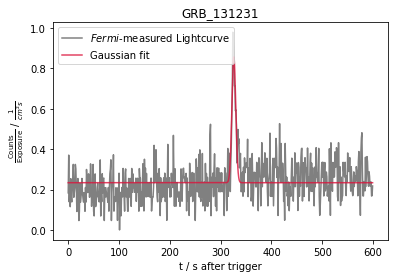

Fitergebnisse Gauß:  [  6.37978705e-01   3.22521439e+02   6.58558900e+00   1.08358698e-01]


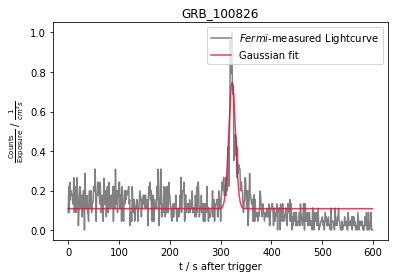

Fitergebnisse Gauß:  [  8.07160580e-01   3.08396468e+02   4.10259053e+00   1.45748427e-02]


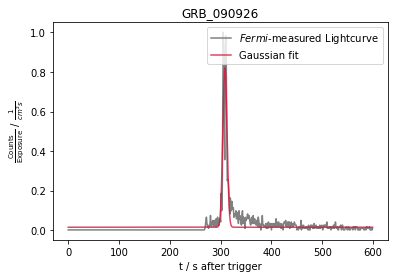

Fitergebnisse Gauß:  [  6.87666910e-01   3.05141898e+02   1.83478706e+00   7.66171885e-02]


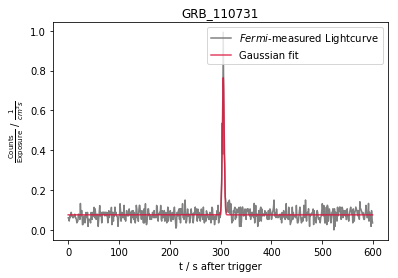

Fitergebnisse Gauß:  [  7.35027186e-01   3.29317490e+02   1.88085682e+00   1.48832647e-01]


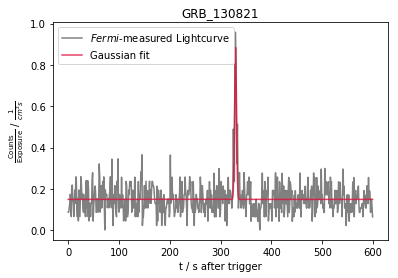

Fitergebnisse Gauß:  [  5.88032213e-01   3.05665138e+02   3.53475579e+00   2.33623197e-01]


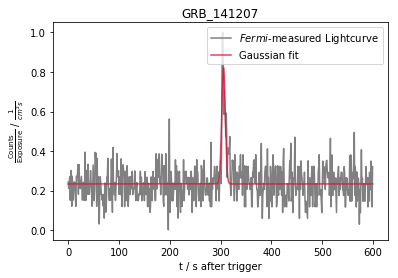

Fitergebnisse Gauß:  [  5.97533730e-01   3.08401507e+02   5.83994253e+00   1.35252088e-01]


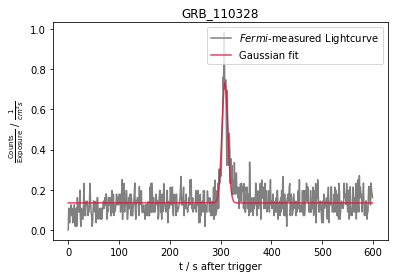

In [53]:
a ="DATA/LC/mittlerer_Gauß" 
Paths = os.listdir(a)
Amplitude = [] ; C_Amplitude = []
Mu = [] ; C_Mu = [] 
Sigma = []; C_Sigma = []
b = [] ; C_b = [] 
Names = [] 
Chi = [] ; p_value = [] 
i = 0 
for Path in Paths:
    full_path = str('%s/%s'%(a,Path))
    rescale_x(full_path) ; rescale_y(full_path)
    Names.append(Path)
    params,cov,chi,p= fit_LC_simple_Gaussian(full_path)
    Amplitude.append(params[0]) ; Mu.append(params[1]), Sigma.append(params[2]), b.append(params[3])
    C_Amplitude.append(cov[0]) ; C_Mu.append(cov[1]), C_Sigma.append(cov[2]), C_b.append(cov[3])
    Chi.append(chi) ; p_value.append(p)

In [54]:
Simple_Gauß = pd.DataFrame(OrderedDict({'NAME': Names, 'AMP': Amplitude, 'AMP_Cov': C_Amplitude, 
                              'MU': Mu, 'MU_Cov': C_Mu,
                              'SIGMA': Sigma, 'SIGMA_Cov': C_Sigma, 
                                    'Y_SHIFT': b, 'SHIFT_Cov': C_b, 
                                        'CHI_squared': Chi, 'P_VALUE': p_value}))
Simple_Gauß

'''''''''''''''''''''''''''''''''''''''''''''''
'  Relative uncertainties in percentage       '
'''''''''''''''''''''''''''''''''''''''''''''''
Proz_Amp = ((Simple_Gauß['AMP_Cov'])/Simple_Gauß['AMP'])*100
Proz_MU = ((Simple_Gauß['MU_Cov'])/Simple_Gauß['MU'])*100
Proz_SIGMA = ((Simple_Gauß['SIGMA_Cov'])/Simple_Gauß['SIGMA'])*100
Proz_b = ((Simple_Gauß['SHIFT_Cov'])/Simple_Gauß['Y_SHIFT'])*100

Simple_Gauß['Error_Amp'] = Proz_Amp
Simple_Gauß['Error_Mu'] = Proz_MU
Simple_Gauß['Error_Sigma'] = Proz_SIGMA
Simple_Gauß['Error_Shift'] = Proz_b

Simple_Gauß

,NAME,AMP,AMP_Cov,MU,MU_Cov,SIGMA,SIGMA_Cov,Y_SHIFT,SHIFT_Cov,CHI_squared,P_VALUE,Error_Amp,Error_Mu,Error_Sigma,Error_Shift
0,LAT_140206.txt,0.820959,0.023143,310.231713,0.126377,3.890451,0.127127,0.066827,0.002057,16.507295,1.0,2.818994,0.040736,3.267664,3.078759
1,LAT_160910.txt,0.561254,0.040358,311.382627,0.274177,3.308663,0.275554,0.117762,0.003301,28.502604,1.0,7.190614,0.088052,8.328253,2.802882
2,LAT_090217.txt,0.599049,0.038216,307.287880,0.209004,2.840980,0.209902,0.168957,0.002891,16.194777,1.0,6.379424,0.068016,7.388360,1.711212
3,LAT_150902.txt,0.555694,0.044418,307.310796,0.399405,4.336295,0.402057,0.202084,0.004177,27.494557,1.0,7.993180,0.129968,9.271891,2.066898
4,LAT_120226.txt,0.388579,0.030601,316.206959,1.444684,16.036640,1.484029,0.307996,0.005818,31.585707,1.0,7.875145,0.456879,9.253988,1.888857
5,LAT_100724.txt,0.618428,0.019812,315.876387,0.212047,5.750229,0.213936,0.057771,0.002158,20.609483,1.0,3.203527,0.067130,3.720484,3.734733
6,LAT_141028.txt,0.642751,0.023095,313.688977,0.240126,5.805331,0.242287,0.119506,0.002528,15.565570,1.0,3.593141,0.076549,4.173526,2.115254
7,LAT_090902.txt,0.708088,0.021610,309.915917,0.131641,3.742980,0.132391,0.072252,0.001883,10.189114,1.0,3.051866,0.042476,3.537058,2.606533
8,LAT_091031.txt,0.611933,0.031550,301.634830,0.132366,2.225535,0.132809,0.115501,0.002107,12.796176,1.0,5.155743,0.043883,5.967508,1.824555
9,LAT_160905.txt,0.471100,0.028031,311.203880,0.189742,2.765200,0.190535,0.082673,0.002092,14.218353,1.0,5.950103,0.060970,6.890452,2.529900


In [55]:
Amp_mean_Simple = Simple_Gauß['AMP'].mean()
Mu_mean_Simple = Simple_Gauß['MU'].mean()
Sigma_mean_Simple = Simple_Gauß['SIGMA'].mean()
b_mean_Simple = Simple_Gauß['Y_SHIFT'].mean()

Mean_params_Simple = np.array([Amp_mean_Simple,Mu_mean_Simple,Sigma_mean_Simple,b_mean_Simple])

print(r'Averaged parameters for  Gaussian Fit (A,MU,Sigma,b) = (',Amp_mean_Simple,Mu_mean_Simple,Sigma_mean_Simple,
      b_mean_Simple,')' )

Amp_min_Simple = Simple_Gauß['AMP'].min()
Mu_min_Simple = Simple_Gauß['MU'].min()
Sigma_min_Simple = Simple_Gauß['SIGMA'].min()
b_min_Simple = Simple_Gauß['Y_SHIFT'].min()
print(r'Minimal parameters for  Gaussian Fit (A,MU,Sigma,b) = (',Amp_min_Simple,Mu_min_Simple,Sigma_min_Simple,
      b_min_Simple,')' )

Amp_max_Simple = Simple_Gauß['AMP'].max()
Mu_max_Simple = Simple_Gauß['MU'].max()
Sigma_max_Simple = Simple_Gauß['SIGMA'].max()
b_max_Simple = Simple_Gauß['Y_SHIFT'].max()
print(r'Maximal parameters for  Gaussian Fit (A,MU,Sigma,b) = (',Amp_max_Simple,Mu_max_Simple,Sigma_max_Simple,
      b_max_Simple,')' )

Averaged parameters for  Gaussian Fit (A,MU,Sigma,b) = ( 0.6266359757899723 312.36083085169093 4.605284998340247 0.13311124043110978 )
Minimal parameters for  Gaussian Fit (A,MU,Sigma,b) = ( 0.388578526771 301.634829942 1.83478705887 0.0145748427161 )
Maximal parameters for  Gaussian Fit (A,MU,Sigma,b) = ( 0.820959238783 329.317489969 16.036639827 0.307995583351 )


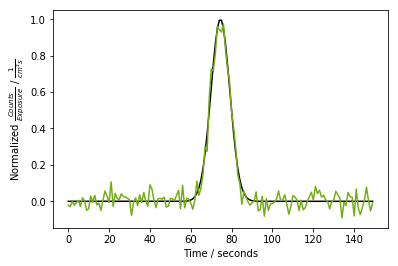

In [6]:
y =signal.gaussian(150,Mean_params_Simple[2]) ## 100 Sekunden, Sigma = 4 ???? 
plt.plot(y,'-', color='k')
plt.xlabel('Time / seconds')
plt.ylabel(r'Normalized $\frac{Counts}{Exposure}$ / $\frac{1}{cm² s}$ ')
noise = np.random.normal(0, 0.04, y.shape)
Signal_noise = y + noise
plt.plot(Signal_noise,color=tugreen)
plt.savefig('Plots/Lc_fits/Simple_Gaussian_Template.pdf')

### b.) Small and  pointed (=Narrow) Gauß 

Fitergebnisse Gauß:  [  8.41584862e-01   3.00031535e+02   5.25732431e-01   1.60824609e-01]


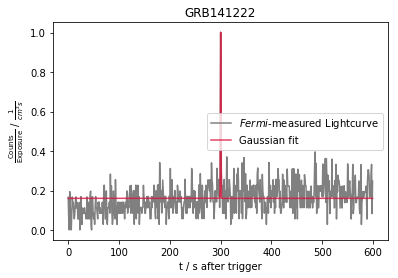

Fitergebnisse Gauß:  [  1.02217351e+00   2.99829094e+02   6.19530706e-01   1.74956303e-02]


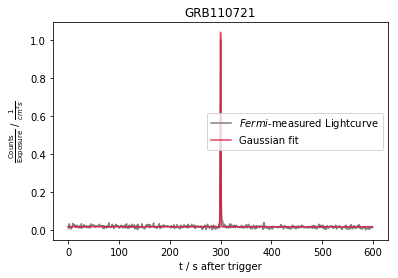

Fitergebnisse Gauß:  [  7.13768335e-01   3.00065007e+02   5.87070348e-01   2.05362934e-01]


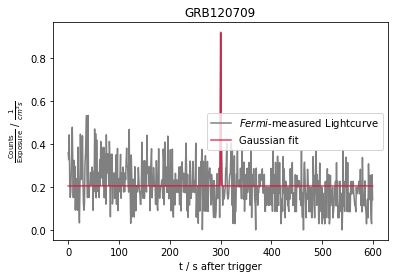

Fitergebnisse Gauß:  [  9.32211003e-01   3.05044392e+02   1.10725177e+00   2.90733428e-02]


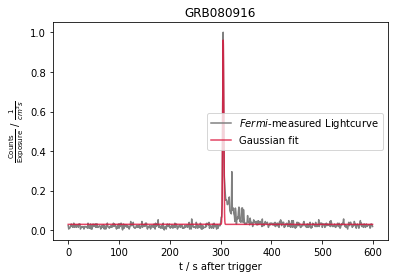

Fitergebnisse Gauß:  [  8.47706752e-01   3.17181317e+02   5.68112499e-01   1.93192181e-01]


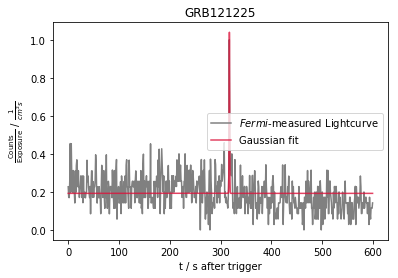

Fitergebnisse Gauß:  [  7.46056501e-01   3.08404251e+02   2.18369825e+00   8.52547813e-02]


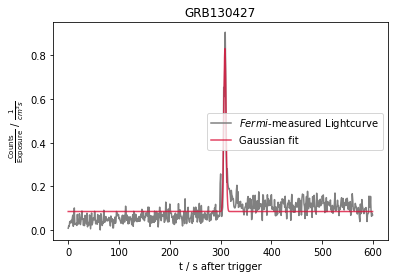

Fitergebnisse Gauß:  [  8.15180755e-01   3.00707468e+02   1.87302500e+00   1.20403751e-01]


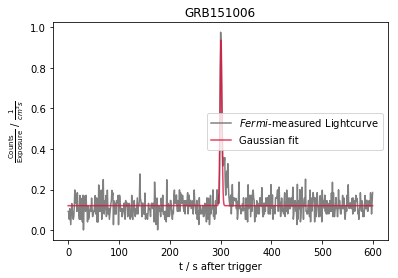

Fitergebnisse Gauß:  [  1.18176232e+00   3.00406222e+02   6.16008245e-01   1.80945197e-02]


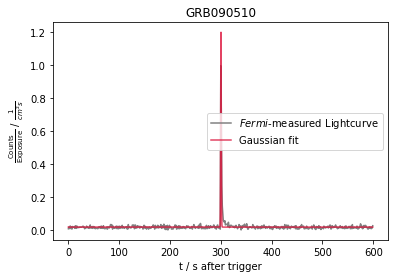

Fitergebnisse Gauß:  [  8.57522860e-01   3.92551447e+02   1.60261006e+00   1.07230073e-01]


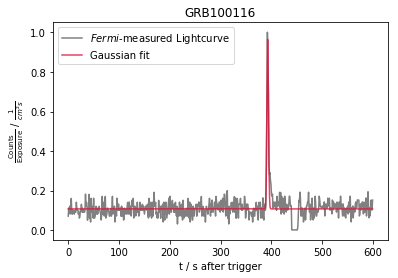

Fitergebnisse Gauß:  [  7.45608696e-01   3.05010394e+02   9.31166108e-01   2.20226007e-01]


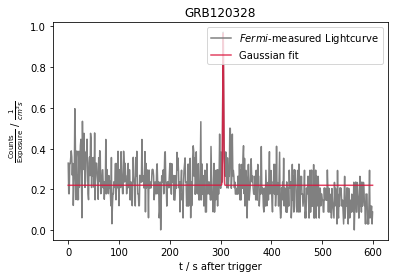

Fitergebnisse Gauß:  [  1.25635371e+00   3.01343932e+02   4.51188833e-01   6.08654713e-02]


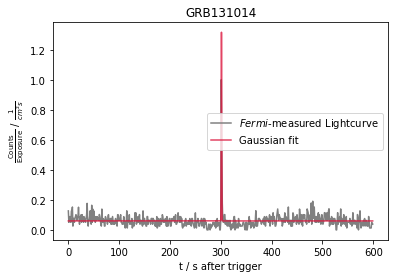

Fitergebnisse Gauß:  [  7.88833170e-01   3.02770040e+02   9.13274603e-01   1.95897263e-01]


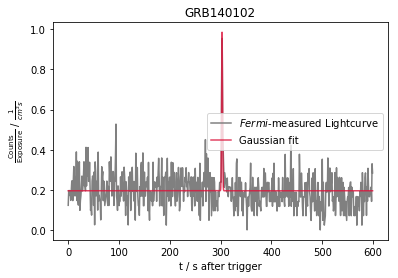

In [5]:
a ="DATA/LC/Schmaler_Gauß" 
Paths = os.listdir(a)
Amplitude = [] ; C_Amplitude = []
Mu = [] ; C_Mu = [] 
Sigma = []; C_Sigma = []
Names = []
Chi = [] ; p_value = []
b = [] ; C_b = [] 
i = 0 
for Path in Paths:
    full_path = str('%s/%s'%(a,Path))
    Names.append(Path)
    rescale_x(full_path) ; rescale_y(full_path)
    params,cov,chi,p= fit_LC_small_Gaussian(full_path)
    Amplitude.append(params[0]) ; Mu.append(params[1]), Sigma.append(params[2]), b.append(params[3])
    C_Amplitude.append(cov[0]) ; C_Mu.append(cov[1]), C_Sigma.append(cov[2]), C_b.append(cov[3])
    Chi.append(chi) ; p_value.append(p)
    

In [6]:
Small_Gauß = pd.DataFrame(OrderedDict({'NAME': Names, 'AMP': Amplitude, 'AMP_Cov': C_Amplitude, 
                              'MU': Mu, 'MU_Cov': C_Mu,
                              'SIGMA': Sigma, 'SIGMA_Cov': C_Sigma, 
                                    'Y_SHIFT': b, 'SHIFT_Cov': C_b, 
                                        'CHI_squared': Chi, 'P_VALUE': p_value}))


Proz_Amp = ((Small_Gauß['AMP_Cov'])/Small_Gauß['AMP'])*100
Proz_MU = ((Small_Gauß['MU_Cov'])/Small_Gauß['MU'])*100
Proz_SIGMA = ((Small_Gauß['SIGMA_Cov'])/Small_Gauß['SIGMA'])*100
Proz_b = ((Small_Gauß['SHIFT_Cov'])/Small_Gauß['Y_SHIFT'])*100

Small_Gauß['Error_Amp'] = Proz_Amp
Small_Gauß['Error_Mu'] = Proz_MU
Small_Gauß['Error_Sigma'] = Proz_SIGMA
Small_Gauß['Error_Shift'] = Proz_b


Small_Gauß.to_csv('Small_Gauss.csv')

Small_Gauß

,NAME,AMP,AMP_Cov,MU,MU_Cov,SIGMA,SIGMA_Cov,Y_SHIFT,SHIFT_Cov,CHI_squared,P_VALUE,Error_Amp,Error_Mu,Error_Sigma,Error_Shift
0,LAT_141222.txt,0.841585,0.074809,300.031535,0.105161,0.525732,0.057469,0.160825,0.003029,20.292271,1.0,8.889099,0.035050,10.931155,1.883231
1,LAT_110721.txt,1.022174,0.007850,299.829094,0.006802,0.619531,0.005491,0.017496,0.000287,1.654254,1.0,0.767990,0.002269,0.886347,1.640531
2,LAT_120709.txt,0.713768,0.098582,300.065007,0.140685,0.587070,0.090157,0.205363,0.003947,26.980456,1.0,13.811452,0.046885,15.357148,1.921948
3,LAT_080916.txt,0.932211,0.023426,305.044392,0.032131,1.107252,0.032137,0.029073,0.001099,13.693743,1.0,2.512943,0.010533,2.902441,3.781045
4,LAT_121225.txt,0.847707,0.104247,317.181317,0.108465,0.568112,0.084996,0.193192,0.003437,21.746466,1.0,12.297586,0.034196,14.961094,1.779025
5,LAT_130427.txt,0.746057,0.026225,308.404251,0.088534,2.183698,0.088825,0.085255,0.001735,11.557426,1.0,3.515128,0.028707,4.067647,2.034789
6,LAT_151006.txt,0.815181,0.033721,300.707468,0.089374,1.873025,0.089625,0.120404,0.002063,11.951717,1.0,4.136587,0.029721,4.785034,1.713598
7,LAT_090510.txt,1.181762,0.025620,300.406222,0.009647,0.616008,0.017025,0.018095,0.000569,4.130931,1.0,2.167970,0.003211,2.763836,3.146459
8,LAT_100116.txt,0.857523,0.027301,392.551447,0.058863,1.602610,0.059004,0.107230,0.001543,7.630542,1.0,3.183649,0.014995,3.681757,1.439403
9,LAT_120328.txt,0.745609,0.091694,305.010394,0.133826,0.931166,0.130791,0.220226,0.003978,25.468023,1.0,12.297819,0.043876,14.045892,1.806105


In [8]:
Amp_mean_Small = Small_Gauß['AMP'].mean()
Mu_mean_Small = Small_Gauß['MU'].mean()
Sigma_mean_Small = Small_Gauß['SIGMA'].mean()
b_mean_Small = Small_Gauß['Y_SHIFT'].mean()

Mean_params_Small = np.array([Amp_mean_Small,Mu_mean_Small,Sigma_mean_Small,b_mean_Small])

print(r'Averaged parameters for narrow Gaussian Fit (A,MU,Sigma,b) = (',Amp_mean_Small,Mu_mean_Small,Sigma_mean_Small,
      b_mean_Small,')' )


Amp_min_Small = Small_Gauß['AMP'].min()
Mu_min_Small = Small_Gauß['MU'].min()
Sigma_min_Small = Small_Gauß['SIGMA'].min()
b_min_Small = Small_Gauß['Y_SHIFT'].min()

Min_params_Small = np.array([Amp_min_Small,Mu_min_Small,Sigma_min_Small,b_min_Small])

print(r'Minimal parameters for narrow Gaussian Fit (A,MU,Sigma,b) = (',Amp_min_Small,Mu_min_Small,Sigma_min_Small,
      b_min_Small,')' )

Amp_max_Small = Small_Gauß['AMP'].max()
Mu_max_Small = Small_Gauß['MU'].max()
Sigma_max_Small = Small_Gauß['SIGMA'].max()
b_max_Small = Small_Gauß['Y_SHIFT'].max()

Max_params_Small = np.array([Amp_max_Small,Mu_max_Small,Sigma_max_Small,b_max_Small])

print(r'Maximal parameters for narrow Gaussian Fit (A,MU,Sigma,b) = (',Amp_max_Small,Mu_max_Small,Sigma_max_Small,
      b_max_Small,')' )

Averaged parameters for narrow Gaussian Fit (A,MU,Sigma,b) = ( 0.8957302068610976 311.11209152420975 0.9982224043156824 0.11782671353674666 )
Minimal parameters for narrow Gaussian Fit (A,MU,Sigma,b) = ( 0.713768335326 299.829093573 0.45118883295 0.017495630283 )
Maximal parameters for narrow Gaussian Fit (A,MU,Sigma,b) = ( 1.25635371141 392.551447315 2.18369825352 0.220226006783 )


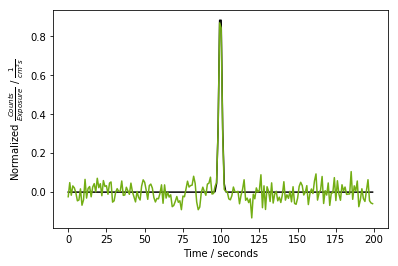

In [9]:
y = signal.gaussian(200,Mean_params_Small[2])
plt.plot(y, color='k')
plt.xlabel('Time / seconds')
plt.ylabel(r'Normalized $\frac{Counts}{Exposure}$ / $\frac{1}{cm² s}$ ')

noise = np.random.normal(0, 0.04, y.shape)
Signal_noise = y + noise
plt.plot(Signal_noise, color=tugreen)

plt.savefig('Plots/Lc_fits/Small_Gaussian_Template.pdf')

## c.) Gaussian Shapes in stellar Flares 

curves clearly wider, longer in time ---> change time scale, otherwise keep Gauss 

##  <font color = #73ae14>  2. Peak with exponential decline 

/home/jana/Schreibtisch/Projekt_Master/Project_Master/Lightcurve.py:109: RuntimeWarning: invalid value encountered in power
  return Fp*(t/tp+b)**(-alpha)


Fitergebnisse Gauß:  [  5.79271848e-03   3.09836901e+02  -9.71514561e-01   1.06696681e+00]


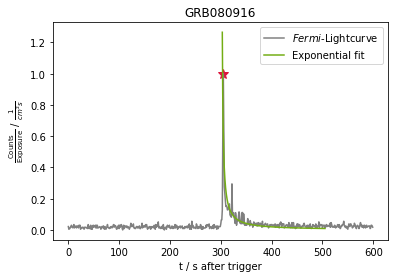

Fitergebnisse Gauß:  [  4.64815254e-02   2.34410354e+02  -1.29296281e+00   6.19032138e-01]


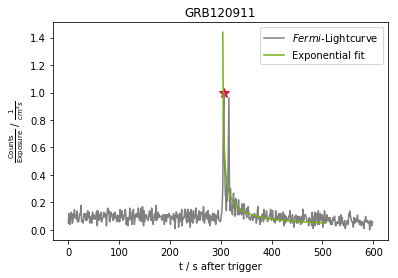

Fitergebnisse Gauß:  [  2.39492386e-02   2.50432944e+02  -1.20598880e+00   9.64653413e-01]


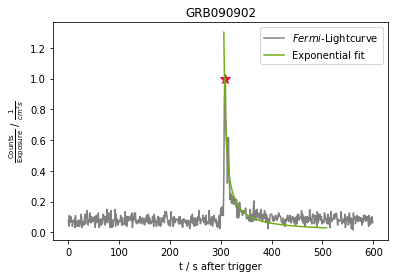

Fitergebnisse Gauß:  [  1.70553920e-01   1.93281784e+02  -1.60384348e+00   1.47896966e-01]


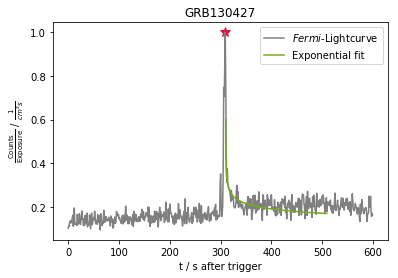

Fitergebnisse Gauß:  [  2.81391621e-02   1.52041782e+02  -1.97269070e+00   4.63252083e-01]


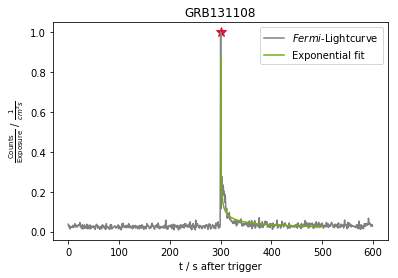

Fitergebnisse Gauß:  [  7.38694760e-04   1.80278604e+02  -1.52270865e+00   4.05468014e+00]


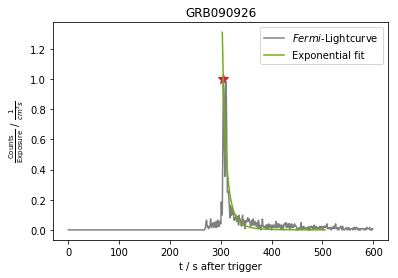

In [10]:
from Lightcurve import fit_LC_Gaussian_exponential
a ="DATA/LC/Exponential" 
Paths = os.listdir(a)
Fp = [] ; C_Fp = []
tp = [] ; C_tp = [] 
Shift = []; C_Shift = []
alpha = [] ; C_alpha = []
Names = []
Chi = [] ; p_value = []

i = 0 
for Path in Paths:
    full_path = str('%s/%s'%(a,Path))
    Offset = np.array([1,1,1,-1,0,0])  ## Beginning of Fit 
    Names.append(Path)
    rescale_x(full_path) ; rescale_y(full_path)
    params,cov,chi,p=fit_LC_Gaussian_exponential(full_path,Offset[i])
    Fp.append(params[0]) ; tp.append(params[1]), Shift.append(params[2]), alpha.append(params[3])
    C_Fp.append(cov[0]) ; C_tp.append(cov[1]), C_Shift.append(cov[2]), C_alpha.append(cov[3])
    Chi.append(chi) ; p_value.append(p)
    i +=1 

In [11]:
Exponential = pd.DataFrame(OrderedDict({'NAME': Names, 'FP': Fp, 'FP_Cov': C_Fp, 
                              'TP': tp, 'TP_Cov': C_tp,
                              'SHIFT': Shift, 'SHIFT_Cov': C_Shift , 
                                    'ALPHA': alpha, 'ALPHA_Cov': C_alpha, 
                                        'CHI_squared': Chi, 'P_VALUE': p_value}))


Proz_Amp = ((Exponential['FP_Cov'])/Exponential['FP'])*100
Proz_TP = ((Exponential['TP_Cov'])/Exponential['TP'])*100
Proz_Shift = ((Exponential['SHIFT_Cov'])/Exponential['SHIFT'])*100
Proz_alpha = ((Exponential['ALPHA_Cov'])/Exponential['ALPHA'])*100

Exponential['Error_Amp'] = Proz_Amp
Exponential['Error_Mu'] = Proz_TP
Exponential['Error_Shift'] = Proz_Shift
Exponential['Error_Alpha'] = Proz_alpha


Exponential.to_csv('Exponential.csv')
Exponential

,NAME,FP,FP_Cov,TP,TP_Cov,SHIFT,SHIFT_Cov,ALPHA,ALPHA_Cov,CHI_squared,P_VALUE,Error_Amp,Error_Mu,Error_Shift,Error_Alpha
0,LAT_080916.txt,0.005793,21.504262,309.836901,1.078144e+06,-0.971515,3379.491812,1.066967,0.361266,1.653388,1.0,3.712292e+05,3.479715e+05,-3.478581e+05,33.859196
1,LAT_120911.txt,0.046482,84.233999,234.410354,6.861442e+05,-1.292963,3784.662764,0.619032,0.203202,3.452666,1.0,1.812204e+05,2.927107e+05,-2.927124e+05,32.825786
2,LAT_090902.txt,0.023949,159.906830,250.432944,1.734657e+06,-1.205989,8346.795707,0.964653,0.233781,1.441151,1.0,6.676907e+05,6.926631e+05,-6.921122e+05,24.234723
3,LAT_130427.txt,0.170554,0.098589,193.281784,7.191154e+02,-1.603843,5.972266,0.147897,0.024107,0.407347,1.0,5.780502e+01,3.720555e+02,-3.723721e+02,16.299629
4,LAT_131108.txt,0.028139,0.289665,152.041782,3.349072e+03,-1.972691,43.457577,0.463252,0.068679,0.712165,1.0,1.029400e+03,2.202731e+03,-2.202959e+03,14.825512
5,LAT_090926.txt,0.000739,1015.225518,180.278604,6.110622e+07,-1.522709,516129.767882,4.054680,8.316149,6.797439,1.0,1.374351e+08,3.389544e+07,-3.389550e+07,205.100010


### Sadly high uncertainties on fitted values 
<br> <br> 
## Create the fit function 

Goal: Stop the E-function at the maximum, before it a sudden increase, so to speak: <br>
$F(t)  = \begin{cases}
     0 & \text{für } x < t_p \\
     F_0 \cdot \left(\frac{t}{t_p} + b\right)^{-\alpha} & \text{für } x \ge t_p \\
   \end{cases}$
   
Fit parameters from exponential waste are first adopted and optimized. 

In [101]:
@np.vectorize
def Step_exp(t,tp,Fp,b ,alpha):
    if t < tp:
        return float(0)  # uniform data types 
    if t >= tp:
        return float(Fp*(t/tp-b)**(-alpha))

array([ 2.86633333,  0.8355    , -1.43666667,  1.41788333])

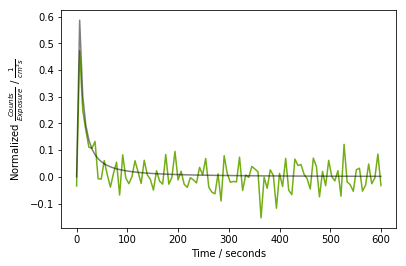

In [102]:
### mean over 6 Templates : Rescaled to -300 to 300
Fps = np.array([1.588,0.905,0.27,0.32,0.61,1.32])
Tps = np.array([1.6,5.8,0.71,2.704,3.68,2.704])
bs = np.array([-0.94,-0.43,-3,-1.87,-0.98,-1.4])
alphas = np.array([1.1669,1.1964,0.95,1.647,1.1,2.447])
'''
#### rescaled with start t=0 
Fps = np.array([0.005793,0.046482, 0.023949,0.170554,0.028139, 0.000739])
Tps = np.array([309.836901,234.410354,250.432944,193.281784,152.041782 ,180.278604])
bs = np.array([-0.971515,-1.292963 	,-1.205989,-1.603843 ,-1.972691,-1.522709])#*(-1)
alphas = np.array([1.066967, 0.619032,0.964653,0.147897,0.463252,4.054680 ])
'''
params = np.array([Tps.mean(),Fps.mean(),bs.mean(),alphas.mean()])

x2 =np.linspace(0,600,100)
y2 = Step_exp(x2,params[0], params[1], params[2], params[3])/ Step_exp(params[0],params[0], params[1], params[2], params[3])
# Normalized :-) 

noise = np.random.normal(0, 0.05, y2.shape)
Signal_noise = y2 + noise
plt.plot(x2,Signal_noise, color=tugreen)

plt.plot(x2,y2, color='k', alpha=0.5)

plt.xlabel('Time / seconds')
plt.ylabel(r'Normalized $\frac{Counts}{Exposure}$ / $\frac{1}{cm² s}$ ')

params




##  <font color = #73ae14>  -----------------------------------------------------------------------------------------------------



## <font color = #73ae14> Ideas for the correct time scale 

 1. copy the function code of signal.gaussian with my fixed parameters 
 2. signal.gaussian with my standard deviation directly use 
 3. reshaping and drawing fixed points from it; 10 fixed points and then depending on # slices more? 
 4. interpolate as it happens with templates (x,y)? 
 
<br> <br>
Use **1st code from signal** & ** 2nd signal.gaussian directly** in comparison 

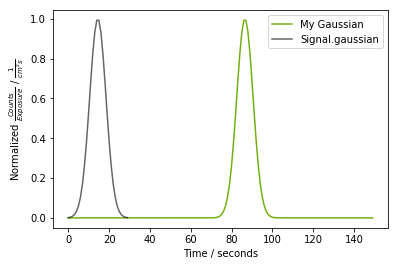

In [50]:
def _len_guards(M):
    """Handle small or incorrect window lengths"""
    if int(M) != M or M < 0:
        raise ValueError('Window length M must be a non-negative integer')
    return M <= 1

def _extend(M, sym):
    """Extend window by 1 sample if needed for DFT-even symmetry"""
    if not sym:
        return M + 1, True
    else:
        return M, False

def _truncate(w, needed):
    """Truncate window by 1 sample if needed for DFT-even symmetry"""
    if needed:
        return w[:-1]
    else:
        return w

def gaussian(M, std, sym=True):
    """Return a Gaussian window."""
    if _len_guards(M):
        return np.ones(M)
    M, needs_trunc = _extend(M, sym)

    n = np.arange(0, M) - (M - 1.0) / 2.0
    sig2 = 2 * std * std
    w = np.exp(-n ** 2 / sig2)
    return _truncate(w, needs_trunc)


# New Code
def my_simple_gaussian(M, A, MU,std,b,sym=True):
    """Return a Gaussian window."""
    if _len_guards(M):
        return np.ones(M)
    M, needs_trunc = _extend(M, sym)

    n = np.arange(0, M) - (M - 1.0) / 2.0
    sig2 = 2 * std * std
    w = A*np.exp(-(n-MU)** 2 / sig2)+b
    return _truncate(w, needs_trunc)


plt.plot(my_simple_gaussian(200,1,0,4,0),color=tugreen)
plt.plot(gaussian(200,4),color='k', alpha=0.4)
#plt.show(); 
plt.clf() 

plt.plot(my_simple_gaussian(150,1,12,4,0), color=tugreen, label='My Gaussian')
plt.plot(gaussian(30,4), color='k', alpha=0.6, label='Signal.gaussian')
plt.xlabel('Time / seconds')
plt.ylabel(r'Normalized $\frac{Counts}{Exposure}$ / $\frac{1}{cm² s}$ ')
plt.legend()
## Shift aus Daten, dass nicht genau zentriert 

** 3. Use of  Reshape ** 

Distance always the same, can then correspond to the 30 seconds e.g. 
Problematic when 100 slices are needed? 
Interim points?? 

Text(0,0.5,'Normalized $\\frac{Counts}{Exposure}$ / $\\frac{1}{cm² s}$ ')

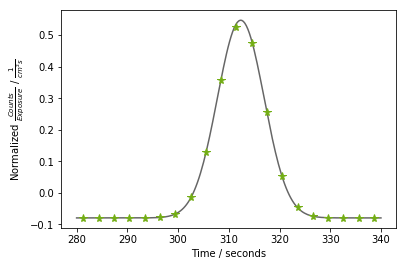

In [57]:
x = np.linspace(280,340,200)
y = Gauss(x,Mean_params_Simple[0], Mean_params_Simple[1], Mean_params_Simple[2], Mean_params_Simple[3])-Mean_params_Simple[3]/Mean_params_Simple[0] 

plt.plot(x,y,color='k', alpha=0.6)

x_shape = np.reshape(x,(20,10))
x_shape[1].mean()
y_shape = np.reshape(y,(20,10))
y_shape[1].mean()
for i in range(0,20):
    x = x_shape[i].mean()
    y = y_shape[i].mean()
    plt.plot(x,y,'*', color=tugreen, ms=8)
plt.xlabel('Time / seconds')
plt.ylabel(r'Normalized $\frac{Counts}{Exposure}$ / $\frac{1}{cm² s}$ ')
    

** 4. Interpolation ? ** 

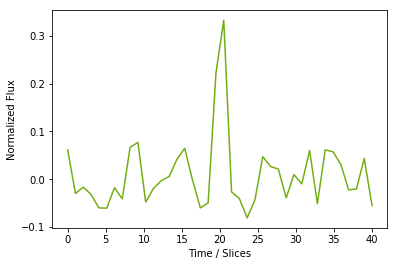

In [72]:
def Simple_Gaussian(Num_slices,noise_percentage):
    Timestamp = np.linspace(0,Num_slices,Num_slices) # 0-19 bei default 20 
    x_Gauss  = range(int(2*Mean_params_Simple[1])) ## Mean bleibt erhalten 
    x_p = np.linspace(Timestamp[0],Num_slices,len(x_Gauss))
    y_p = (Gauss(x_Gauss,Mean_params_Simple[0], Mean_params_Simple[1], Mean_params_Simple[2], Mean_params_Simple[3])-Mean_params_Simple[3])/Mean_params_Simple[0] 
    y = np.interp(Timestamp,x_p,y_p)
    
    noise = np.random.normal(0,noise_percentage/100.0, y.shape)
    y = y + noise
    
    plt.plot(Timestamp,y, color=tugreen)
    plt.xlabel('Time / Slices')
    plt.ylabel('Normalized Flux')#
    plt.savefig('Plots/Lc_fits/Simple_Gaussian_Template.pdf')
    return y 
    
ylone = Simple_Gaussian(40,5) # keine Veränderungen 

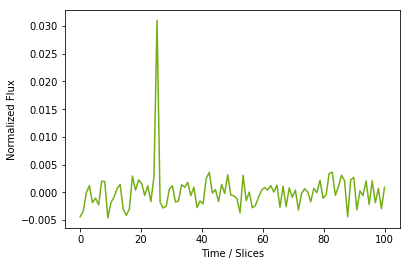

In [90]:
def Small_Gaussian(Num_slices,noise_percentage):
    Timestamp = np.linspace(0,Num_slices,Num_slices) # 0-19 bei default 20 
    x_Gauss  = range(int(4*Mean_params_Small[1]))  ## Mean bleibt erhalten 
    x_p = np.linspace(Timestamp[0],Num_slices,len(x_Gauss))
    y_p = (Gauss(x_Gauss,Mean_params_Small[0], Mean_params_Small[1], Mean_params_Small[2], Mean_params_Small[3])-Mean_params_Small[3])/Mean_params_Small[0] 
    y = np.interp(Timestamp,x_p,y_p)
    
    noise = np.random.normal(0, noise_percentage/100.0, y.shape)
    y = y + noise
    
    plt.plot(Timestamp,y, color=tugreen)
    plt.xlabel('Time / Slices')
    plt.ylabel('Normalized Flux')#
    plt.savefig('Plots/Lc_fits/Small_Gaussian_Template.pdf')
    return y 
    
ylons = Small_Gaussian(100,0.2) # keine Veränderungen 

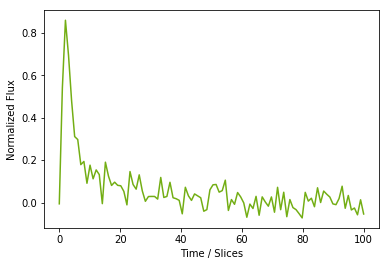

In [103]:
def Exponential(Num_slices, noise_percentage):
    Timestamp = np.linspace(0,Num_slices,Num_slices) # 0-19 bei default 20 
    x_Exp = np.linspace(0,600) 
    x_p = np.linspace(Timestamp[0],Num_slices,len(x_Exp))
    y_p = Step_exp(x_Exp,params[0], params[1], params[2], params[3])/ Step_exp(x_Exp,params[0], params[1], params[2], params[3]).max()
    y = np.interp(Timestamp,x_p,y_p)
    
    noise = np.random.normal(0, noise_percentage/100.0, y.shape)
    y = y + noise
    
    plt.plot(Timestamp,y, color=tugreen)
    plt.xlabel('Time / Slices')
    plt.ylabel('Normalized Flux')#
    plt.savefig('Plots/Lc_fits/Exponential_Template.pdf')
    
Exponential(100,5) # keine Veränderungen 

#### 5. Rescaling with fixed function parameters

33

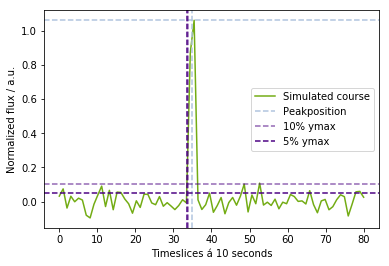

In [155]:
import matplotlib.pyplot as plt
import numpy as np 
from collections import OrderedDict
from random import uniform 

def Gauss_Norm(x, x0, sigma,b):
    return np.exp(-(x-x0)**2/(2*sigma**2))+b

def x_from_y_Gauss(percentage,y,sigma,mu):
    return -np.sqrt(2*np.log(1/(percentage*y)))*sigma+mu

def simulate_Gaussians(sigma_range_min,sigma_range_max,Num_slices,time_per_slice):
    time = Num_slices*time_per_slice 

    '''
    Rescale sigmas to given time & randomply drag a float sigma value 
    '''
    sigma_range_min_time = sigma_range_min/(600)*time 
    sigma_range_max_time = sigma_range_max/(600)*time 

    sigma = uniform(sigma_range_min_time,sigma_range_max_time)

    '''
    Adjust possible positions for the peak: mu 
    Start with 3 slices + 1 sigma before peak 
    End with 3 sliced and 1 sigma after peak 
    '''
    mu_min = sigma_range_max_time+time_per_slice*3
    mu_max = Num_slices*time_per_slice -3*time_per_slice -sigma_range_max_time

    mu = uniform(mu_min,mu_max)

    '''
    Calculate #N_slices values, normal distributed around random mu and sigma 
    '''
    xlin = np.linspace(0,time,Num_slices)
    ylin = Gauss_Norm(xlin,mu,sigma,0)
    y = ylin.max() 
    ylin = ylin/y
    noise = np.random.normal(0,0.04, ylin.shape)
    ylin = ylin + noise
    
    
    plt.plot(xlin/time_per_slice ,ylin,'-', color='#73ac14',label='Simulated course')

    plt.axvline(mu/time_per_slice ,linestyle='--', color='lightsteelblue', label='Peakposition')
    plt.axhline(ylin.max(),linestyle='--', color='lightsteelblue')

    plt.axvline(x_from_y_Gauss(0.1,y,sigma,mu)/time_per_slice , linestyle='--', color='indigo',alpha=0.6,label='10% ymax')
    plt.axhline(0.1*ylin.max(),linestyle='--', color='indigo', alpha=0.6)

    plt.axvline(x_from_y_Gauss(0.05,y,sigma,mu)/time_per_slice, linestyle='--', color='indigo',label='5% ymax')
    plt.axhline(0.05*ylin.max(),linestyle='--', color='indigo')
    True_Start = int(x_from_y_Gauss(0.05,y,sigma,mu)/time_per_slice) # Number of slice 
    
    plt.legend()
    #plt.xlim(20,40)
    plt.xlabel('Timeslices á 10 seconds')
    plt.ylabel('Normalized flux / a.u.')
    return ylin, True_Start
    
    
y,True_Start = simulate_Gaussians(1.8348,16.0364,80,10)
plt.savefig('Plots/Lc_fits/New_Results_21.pdf')
True_Start   ## +/- 2 Slices Toleranz 

5

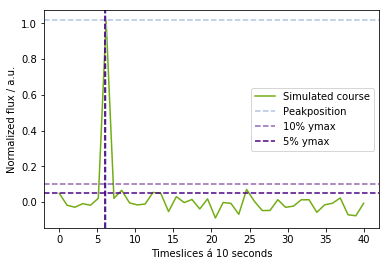

In [156]:
y,True_Start = simulate_Gaussians(0.4511,2.183,40,10)
plt.savefig('Plots/Lc_fits/New_Results_15.pdf')
True_Start   ## +/- 2 Slices Toleranz 

4.422443954760665 0.012868396584644339


21

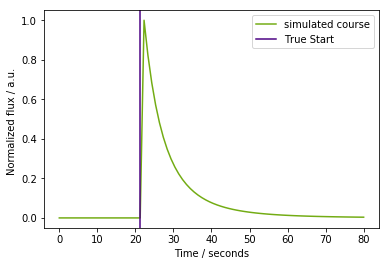

In [160]:
@np.vectorize
def Step_exp(t,tp,Fp,b ,alpha):
    if t < tp:
        return float(0)  # uniform data types 
    if t >= tp:
        return float(Fp*(t/tp+b)**(-alpha))
    
### mean over 6 Templates : Rescaled to -300 to 300
alpha_min = 3
b_min = 0
alpha_max = 6
b_max = 2

def simulate_Exponential(alpha_min,alpha_max,b_min,b_max,Num_slices,time_per_slice):
    time = Num_slices*time_per_slice 
    alpha_min_time = alpha_min
    b_min_time = b_min/600*time
    alpha_max_time = alpha_max
    b_max_time = b_max/600*time
    
    b = uniform(b_min_time,b_max_time)
    alpha = uniform(alpha_min_time, alpha_max_time)

    tp = uniform(0,time/3)

    params = np.array([tp,1,b,alpha])

    x2 =np.linspace(0,time,Num_slices)
    y2 = Step_exp(x2,params[0], params[1], params[2], params[3])
    y2 = y2/y2.max()
    noise = np.random.normal(0,0.00, y2.shape)
    y2 = y2 + noise
    
    plt.plot(x2/time_per_slice,y2, color='#73ac14',label='simulated course')
    plt.axvline(tp/time_per_slice,color='indigo', label='True Start')
    plt.xlabel('Time / seconds')
    plt.ylabel(r'Normalized flux / a.u. ')
    plt.legend()
    print(alpha,b)
    True_Start = tp/time_per_slice

    return y2,int(True_Start)

y,True_Start = simulate_Exponential(alpha_min,alpha_max,b_min,b_max,80,10)
plt.savefig('Plots/Lc_fits/New_Results_20.pdf')
True_Start

### Check templates in usage of tool 

see https://github.com/lena-lin/cta_transient_search

120

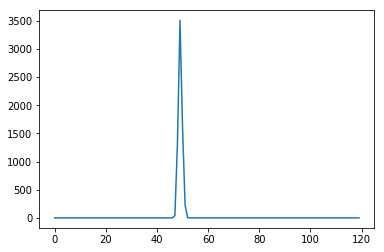

In [210]:
from astropy import table
from astropy.table import Table
table_alert = Table.read('/home/jana/Schreibtisch/Projekt_Master/cta_transient_search/build/n5_s120_trandom_alert.hdf5', path='data')

transient =table_alert[1]
ts = transient['trigger_index']
rt, = np.where(np.diff(ts.astype(int)) == 1)
rt

cube = Table.read('/home/jana/Schreibtisch/Projekt_Master/cta_transient_search/build/n5_s120_trandom_cube.hdf5', path='data')
trans = Table.read('/home/jana/Schreibtisch/Projekt_Master/cta_transient_search/build/n5_s120_trandom_trans.hdf5', path='data')
dent = Table.read('/home/jana/Schreibtisch/Projekt_Master/cta_transient_search/build/n5_s120_trandom_denoised.hdf5', path='data')


#cube = cube[2]
trans = trans[2]
den = dent[2]


trans_factor = dent['cube_smoothed'].max(axis=2).max(axis=2)
#plt.plot(trans_factor[2])

trans['template'] # 2 = Exponential, 0/1 = Gaussian 
trans['start_flare']

plt.plot(trans['timeseries'])
#for i in range(0,len(cube['cube'])):
    #plt.plot(i,cube['cube'][i].max(),'*',color='red')
Cube = cube['cube'].max(axis=2).max(axis=2)
#plt.plot(Cube[2])

#for i in range(0, len(den['cube_smoothed'])):
   # plt.plot(i,den['cube_smoothed'][i].max(),'*')

    
len(den['cube_smoothed'])
len(cube['cube'])
len(trans['timeseries'])

<br> <br> <br> <br>

### Which assumptions are realistic for times and strengths? 

Comparison with Crab? 
- 1 erg = $0.1 \mu$J (1 eV = $1.602 \cdot 10^{-19} $J)
- Fluence in erg/cm² = Energy per area 
- flow in erg/cm² s divided by mean duration 


In [2]:
### T90 Zeiten aus GBM 
from astropy.io import fits
Datei = fits.open('Kataloge/GRBST.fits',ignore_missing_end=True)
Katalog = Datei['FERMIGBRST']

Times =  Katalog.data['T90']

print('Mittlere Dauer des prompten Bursts = ' ,Times.mean(), ' Sekunden') 
print('Minimale Dauer des prompten Bursts = ' ,Times.min(), ' Sekunden') 
print('Maximale Dauer des prompten Bursts = ' ,Times.max(), ' Sekunden') 
print('-------------------------------------------------------------------')

Mittlere Dauer des prompten Bursts =  37.08867  Sekunden
Minimale Dauer des prompten Bursts =  0.016  Sekunden
Maximale Dauer des prompten Bursts =  454.665  Sekunden
-------------------------------------------------------------------


In [3]:
### T95 aus LAT Catalog
Datei = fits.open('Kataloge/FermiLGRB.fits',ignore_missing_end=True)

Katalog = Datei['FERMILGRB']
EMax = Katalog.data['MAX_ENERGY']
T95 = Katalog.data['T95_LAT']
Fluence = Katalog.data['FLUENCE']

print('Mittlere Dauer des Bursts im T95 = ' ,T95.mean(), ' Sekunden') 
print('Minimale Dauer des Bursts im T95 = ' ,T95.min(), ' Sekunden') 
print('Maximale Dauer des  Bursts im T95 = ' ,T95.max(), ' Sekunden') 
print('--------------------------------------------------------------')

Mittlere Dauer des Bursts im T95 =  134.085714286  Sekunden
Minimale Dauer des Bursts im T95 =  0.0  Sekunden
Maximale Dauer des  Bursts im T95 =  800.0  Sekunden
--------------------------------------------------------------


### Works $\chi²$ Test?

Simple test on almost linear data points (randomly selected) by fitting linear and square. 
the $p$ value decreases if the fit (=zero hypothesis?) does not match the data points. <br>
----->Goal  is a high $p$ value** 

At 10-3 = 7 degrees of freedom the $\chi²$ table results in: <br> <br>
0.995 0.975 0.200 0.1000 0.0500 0.02500 0.0200 0.0100 0.0050 0.0020 0.0010 <br>
0.989 1.690 9.803 12.017 14.067 16.013  16.622 18.475 20.278 22.601 24.322 <br> 


----> Fit with $\chi² = 0,404$ tolerates a $\alpha = 0.5 $

Linear:  0.40371384561 0.999987913007
Squared:  4.55982887034 0.870869401315


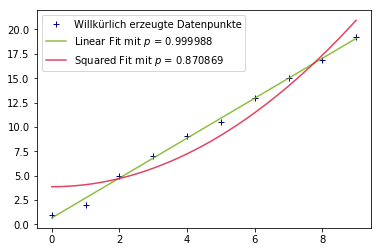

In [12]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([1.01,2,4.95,7.02,9.1,10.54,13,15.03,16.9,19.2])

plt.plot(x,y,'+', color='navy',label='Willkürlich erzeugte Datenpunkte')

def Lin(x,a,b):
    return a*x+b 

def Quad(x,a,b):
    return a*x**2+b 

params, cov = curve_fit(Lin, x,y, p0=(2,0))
xlin = np.linspace(x[0],x[len(x)-1], 100000)


params2, cov2 = curve_fit(Quad, x,y, p0=(1,-1))




observed_values= y ; expected_values= Lin(x,*params)
Chi,p = stats.chisquare(observed_values, f_exp=expected_values) ; print('Linear: ',Chi,p)


observed_values= y ; expected_values= Quad(x,*params2)
Chi2,p2 = stats.chisquare(observed_values, f_exp=expected_values) ; print('Squared: ',Chi2,p2)

plt.plot(xlin,Lin(xlin,*params),color=tugreen, alpha = 0.8, label='Linear Fit mit $p$ = %f'%(p))
plt.plot(xlin,Quad(xlin,*params2),color='crimson', alpha = 0.8, label='Squared Fit mit $p$ = %f'%(p2))
plt.legend()
plt.savefig('Plots/Beispiel_Chi.pdf')